In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir=r"/content/drive/MyDrive/Black_samples"
os.listdir(base_dir)

['Day_1', 'day_2', 'Day_3']

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
def load_dataset(directory):
    images = []
    labels = []

    for day_folder in os.listdir(directory):
        day_path = os.path.join(directory, day_folder)

        if os.path.isdir(day_path):
            for filename in os.listdir(day_path):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    image_path = os.path.join(day_path, filename)
                    label = int(day_folder[-1])  # Extract day number from folder name

                    # Read and preprocess the image
                    img = cv2.imread(image_path)
                    img = cv2.resize(img, (100, 100))

                    images.append(img/255)  # Flatten the image array
                    # print(img.shape, transformed_img.shape)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load the dataset from the specified directory
dataset_directory = '/content/drive/MyDrive/Black_samples'
images, labels = load_dataset(dataset_directory)

In [ ]:
labels = labels - 1
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
eval_images, test_images, eval_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

In [ ]:
len(train_images)

254

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


data_gen.fit(train_images)

train_generator = data_gen.flow(
    train_images,
    train_labels,
    batch_size=8
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation=tf.keras.layers.ReLU()),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 22853411 (87.18 MB)
Trainable params: 1050627 (4.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
for it in train_generator:
    print(it[0].shape)
    op = model(it[0])
    print(op.shape)
    break

(8, 100, 100, 3)
(8, 3)


In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint('./drive/MyDrive/inceptionv3', monitor = 'loss', save_best_only = True, verbose = 1)

In [ ]:
epochs = 90

# Fit the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=(eval_images, eval_labels),
    callbacks=[callback]
)

Epoch 1/90
32/32 [==============================] - ETA: 0s - loss: 2.3790 - accuracy: 0.4803
Epoch 1: loss improved from inf to 2.37900, saving model to ./drive/MyDrive/inceptionv3
32/32 [==============================] - 35s 956ms/step - loss: 2.3790 - accuracy: 0.4803 - val_loss: 1.7565 - val_accuracy: 0.7500
Epoch 2/90
31/32 [============================>.] - ETA: 0s - loss: 0.7751 - accuracy: 0.7236
Epoch 2: loss improved from 2.37900 to 0.76927, saving model to ./drive/MyDrive/inceptionv3
32/32 [==============================] - 29s 938ms/step - loss: 0.7693 - accuracy: 0.7244 - val_loss: 0.6127 - val_accuracy: 0.7812
Epoch 3/90
32/32 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.8031
Epoch 3: loss improved from 0.76927 to 0.54986, saving model to ./drive/MyDrive/inceptionv3
32/32 [==============================] - 28s 912ms/step - loss: 0.5499 - accuracy: 0.8031 - val_loss: 0.4699 - val_accuracy: 0.7500
Epoch 4/90
31/32 [============================>.] 

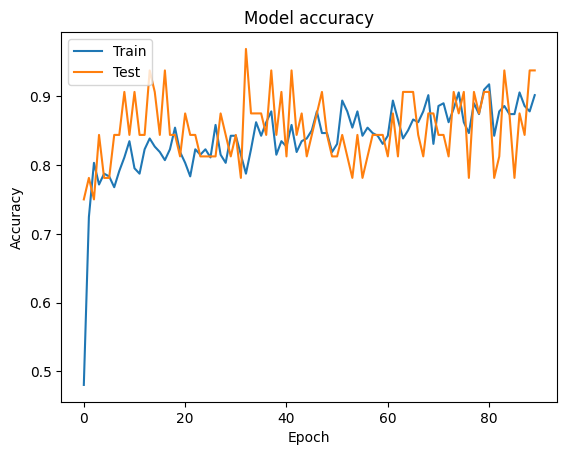

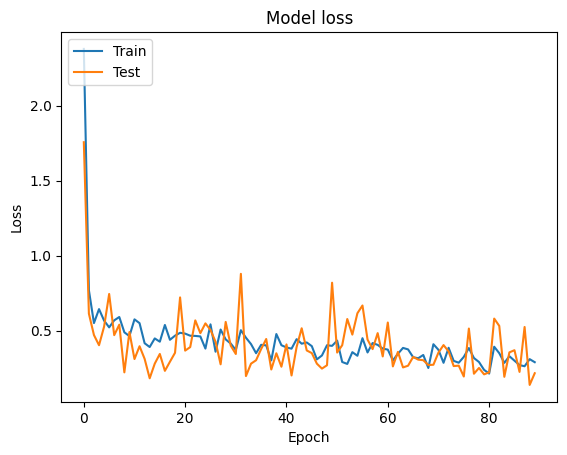

In [ ]:
# Optional: Plot the training process: loss and accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import shutil
shutil.make_archive('./drive/MyDrive/inceptionv3', 'zip', './drive/MyDrive/inceptionv3')

'/content/drive/MyDrive/inceptionv3.zip'

In [ ]:
import zipfile
with zipfile.ZipFile('./drive/MyDrive/inceptionv3.zip', 'r') as zip_ref:
    zip_ref.extractall('./drive/MyDrive/inceptionv3')

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/inceptionv3')

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# If your model outputs softmax probabilities, you might need to convert these to hard labels
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Assuming y_test is also encoded as integers, if it's one-hot encoded, convert it back
# y_test_integers = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Generate the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

print(cm)


1/1 [==============================] - 5s 5s/step
[[15  0  0]
 [ 0  5  5]
 [ 0  1  6]]


In [ ]:
import keras
scce = keras.losses.SparseCategoricalCrossentropy()
scce(test_labels, predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=0.43354642>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.50      0.62        10
           2       0.55      0.86      0.67         7

    accuracy                           0.81        32
   macro avg       0.79      0.79      0.76        32
weighted avg       0.85      0.81      0.81        32



In [ ]:
np.sum([cm[i][i] for i in range(len(cm))]) / np.array(cm).sum()

0.8125